In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/tmpwcjfqxkx.csv')
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
1,I92089785,3005,NaN,SICK ASSIST,E13,574,0,2019-11-05 18:00:00,2019,11,Tuesday,18,NaN,WASHINGTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
2,I90583827,1402,NaN,VANDALISM,E18,498,0,2019-11-02 05:09:00,2019,11,Saturday,5,NaN,BRADLEE ST,NaN,NaN,"(0.00000000, 0.00000000)"
3,I192082859,724,Auto Theft,AUTO THEFT,E18,519,NaN,2019-10-13 09:28:24,2019,10,Sunday,9,Part One,LINCOLN ST,42.259518,-71.121563,"(42.25951765, -71.12156299)"
4,I192082751,724,Auto Theft,AUTO THEFT,E18,493,NaN,2019-10-12 20:11:26,2019,10,Saturday,20,Part One,METROPOLITAN AVE,42.262092,-71.116710,"(42.26209214, -71.11670964)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439016 entries, 0 to 439015
Data columns (total 17 columns):
INCIDENT_NUMBER        439016 non-null object
OFFENSE_CODE           439016 non-null int64
OFFENSE_CODE_GROUP     426840 non-null object
OFFENSE_DESCRIPTION    439016 non-null object
DISTRICT               436780 non-null object
REPORTING_AREA         439016 non-null object
SHOOTING               13923 non-null object
OCCURRED_ON_DATE       439016 non-null object
YEAR                   439016 non-null int64
MONTH                  439016 non-null int64
DAY_OF_WEEK            439016 non-null object
HOUR                   439016 non-null int64
UCR_PART               426730 non-null object
STREET                 425342 non-null object
Lat                    399636 non-null float64
Long                   399636 non-null float64
Location               439016 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 56.9+ MB


In [7]:
df.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,439016.000000,439016.000000,439016.000000,439016.000000,399636.000000,399636.000000
mean,2329.037163,2017.145302,6.745989,13.111543,42.221634,-70.920432
std,1181.888914,1.303983,3.288006,6.304588,2.084320,3.371579
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1102.000000,2016.000000,4.000000,9.000000,42.297105,-71.097223
50%,3001.000000,2017.000000,7.000000,14.000000,42.325538,-71.077619
75%,3201.000000,2018.000000,9.000000,18.000000,42.348546,-71.062583
max,3831.000000,2019.000000,12.000000,23.000000,42.395042,-1.000000


In [10]:
df["SHOOTING"].fillna("N", inplace = True)
df["DAY_OF_WEEK"] = pd.Categorical(df["DAY_OF_WEEK"], 
              categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
              ordered=True)
df["Lat"].replace(-1, None, inplace=True)
df["Long"].replace(-1, None, inplace=True)


In [12]:
def getDate(dateStr, numChar):
    return dateStr[0:numChar]

df['DATE'] = df['OCCURRED_ON_DATE'].apply(getDate, numChar = 10)
df['YEARMONTH'] = df['OCCURRED_ON_DATE'].apply(getDate, numChar = 7)

df[['YEARMONTH', 'DATE', 'OCCURRED_ON_DATE']].head()

,YEARMONTH,DATE,OCCURRED_ON_DATE
0,2019-10,2019-10-16,2019-10-16 00:00:00
1,2019-11,2019-11-05,2019-11-05 18:00:00
2,2019-11,2019-11-02,2019-11-02 05:09:00
3,2019-10,2019-10-13,2019-10-13 09:28:24
4,2019-10,2019-10-12,2019-10-12 20:11:26


In [13]:
timeOccurencesNormal = df[['INCIDENT_NUMBER','OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'SHOOTING',
                           'DAY_OF_WEEK', 'HOUR', 'DATE', 'YEARMONTH']]
timeOccurencesDedup  = df[['INCIDENT_NUMBER','OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'SHOOTING',
                           'DAY_OF_WEEK', 'HOUR', 'DATE', 'YEARMONTH']].drop_duplicates()

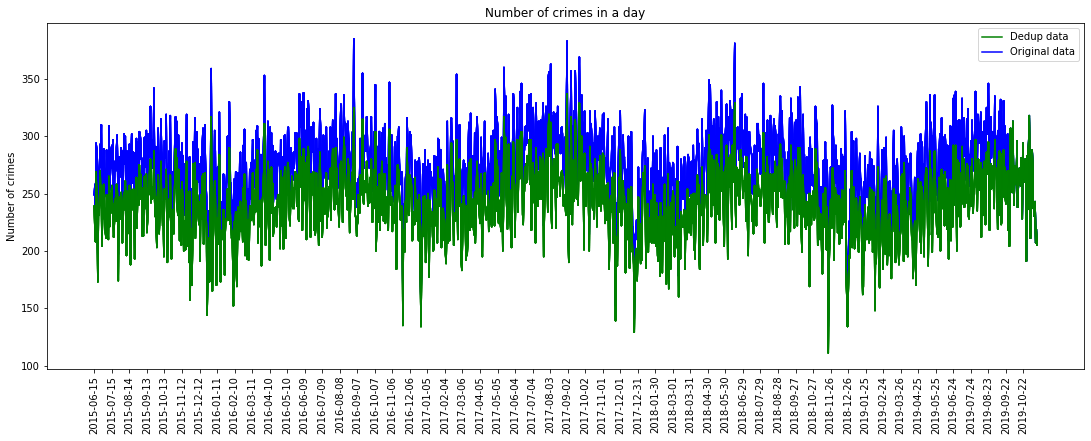

In [14]:
fig = plt.figure(figsize=(18,6))

axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(timeOccurencesNormal.groupby('DATE').count(), 
          c = 'blue', label = "Original data")
axes.plot(timeOccurencesDedup.groupby('DATE').count(), 
          c = 'green', label = "Dedup data")
plt.xticks(rotation = 90)
plt.legend()
axes.set_title("Number of crimes in a day")
axes.set_ylabel("Number of crimes")

labelsX = timeOccurencesNormal.groupby('DATE').count().index[::30]
plt.xticks(labelsX, rotation='vertical')

#I've got duplicated legend here, so I used remedy:
# https://stackoverflow.com/questions/19385639/duplicate-items-in-legend-in-matplotlib
handles, labels = axes.get_legend_handles_labels() 
i = np.arange(len(labels))
filter = np.array([])
unique_labels = list(set(labels))
for ul in unique_labels:
    filter = np.append(filter, [i[np.array(labels) == ul][0]]) 
    
handles = [handles[int(f)] for f in filter] 
labels = [labels[int(f)] for f in filter]
axes.legend(handles, labels) 

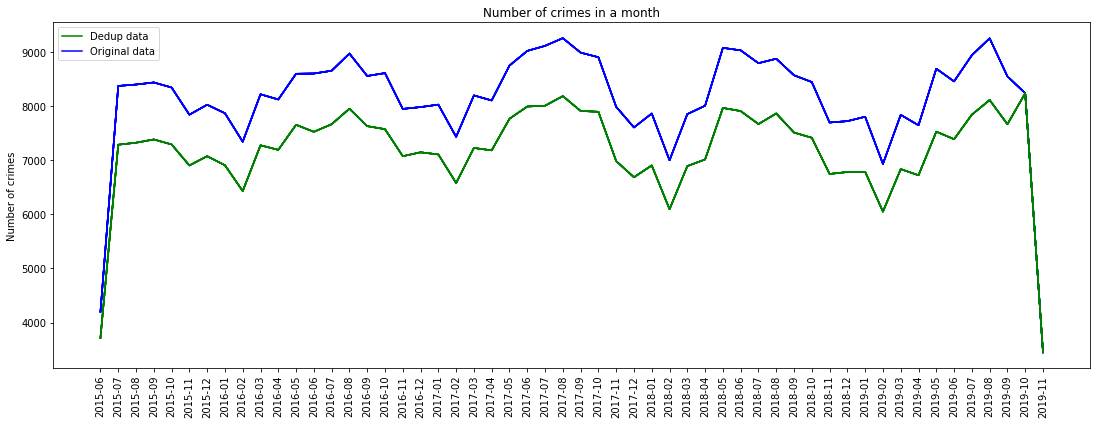

In [15]:
fig = plt.figure(figsize=(18,6))

axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(timeOccurencesNormal.groupby('YEARMONTH').count(), 
          c = 'blue', label = "Original data")
axes.plot(timeOccurencesDedup.groupby('YEARMONTH').count(), 
          c = 'green', label = "Dedup data")
plt.xticks(rotation = 90)
plt.legend()
axes.set_title("Number of crimes in a month")
axes.set_ylabel("Number of crimes")

#I've got duplicated legend here, so I used remedy:
# https://stackoverflow.com/questions/19385639/duplicate-items-in-legend-in-matplotlib
handles, labels = axes.get_legend_handles_labels() 
i = np.arange(len(labels))
filter = np.array([])
unique_labels = list(set(labels))
for ul in unique_labels:
    filter = np.append(filter, [i[np.array(labels) == ul][0]]) 
    
handles = [handles[int(f)] for f in filter] 
labels = [labels[int(f)] for f in filter]
axes.legend(handles, labels)  

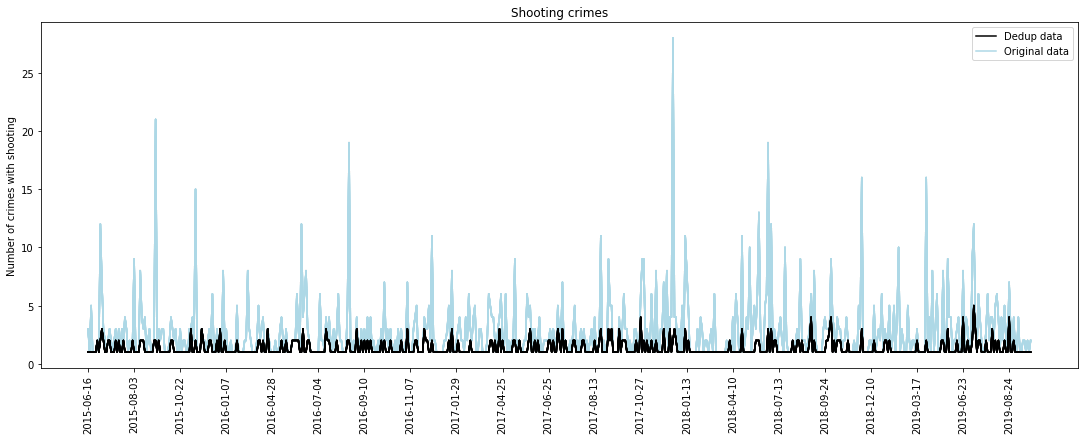

In [16]:
fig = plt.figure(figsize=(18,6))

axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(timeOccurencesNormal[timeOccurencesNormal["SHOOTING"] == "Y"].groupby('DATE').count(), 
          c = 'lightblue', label = "Original data")
axes.plot(timeOccurencesDedup[timeOccurencesDedup["SHOOTING"] == "Y"].groupby('DATE').count(), 
          c = 'black', label = "Dedup data")
plt.xticks(rotation = 90)
plt.legend()
axes.set_title("Shooting crimes")
axes.set_ylabel("Number of crimes with shooting")

labelsX = timeOccurencesNormal[timeOccurencesNormal["SHOOTING"] == "Y"].groupby('DATE').count().index[::30]
plt.xticks(labelsX, rotation='vertical')

#I've got duplicated legend here, so I used remedy:
# https://stackoverflow.com/questions/19385639/duplicate-items-in-legend-in-matplotlib
handles, labels = axes.get_legend_handles_labels() 
i = np.arange(len(labels))
filter = np.array([])
unique_labels = list(set(labels))
for ul in unique_labels:
    filter = np.append(filter, [i[np.array(labels) == ul][0]]) 
    
handles = [handles[int(f)] for f in filter] 
labels = [labels[int(f)] for f in filter]
axes.legend(handles, labels) 

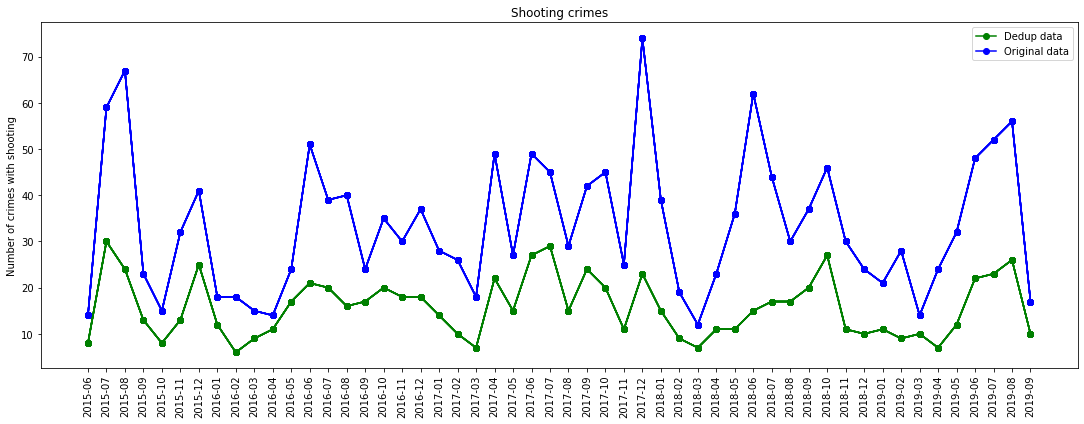

In [17]:
fig = plt.figure(figsize=(18,6))

axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(timeOccurencesNormal[timeOccurencesNormal["SHOOTING"] == "Y"].groupby('YEARMONTH').count(), 
          c = 'blue', label = "Original data", marker = "o")
axes.plot(timeOccurencesDedup[timeOccurencesDedup["SHOOTING"] == "Y"].groupby('YEARMONTH').count(), 
          c = 'green', label = "Dedup data", marker="o")
plt.xticks(rotation = 90)
plt.legend()
axes.set_title("Shooting crimes")
axes.set_ylabel("Number of crimes with shooting")

#I've got duplicated legend here, so I used remedy:
# https://stackoverflow.com/questions/19385639/duplicate-items-in-legend-in-matplotlib
handles, labels = axes.get_legend_handles_labels() 
i = np.arange(len(labels))
filter = np.array([])
unique_labels = list(set(labels))
for ul in unique_labels:
    filter = np.append(filter, [i[np.array(labels) == ul][0]]) 
    
handles = [handles[int(f)] for f in filter] 
labels = [labels[int(f)] for f in filter]
axes.legend(handles, labels) 